In [1]:
import ee

In [2]:
import geemap
from datetime import datetime
import numpy as np
import rasterio
import matplotlib.pyplot as plt 
import pandas as pd
from datetime import date
from datetime import timedelta
import os

In [3]:
import folium

In [4]:
ee.Authenticate()

ee.Initialize()

Enter verification code: 4/1AWgavdeWCZK6TVlHUAEmGRpZQ_aLu-UiSmVZlYEtAUqNcqoBRczwgRbK5cw\

Successfully saved authorization token.


In [4]:
def cloudscore(image):
    '''
    Inner function for computing cloud score such that we can remove 
    bad images from the landsat collections we download.
    Implementation in javascript can be found of Google Earth Engine 
    website under (landsat algorithms), translation to python by KH.
    Further help from Nicholas Clinton at 
    https://urldefense.com/v3/__https://gis.stackexchange.com/questions/252685/filter-landsat-images-base-on-cloud-cover-over-a-region-of-interest*5Cn__;JQ!!LLK065n_VXAQ!zP9K-68-_oPkaNWFZdbTYYnai85ggL4j3FhdqssLkim-RneBr2NqD6Ka4fu6yw-v$         '''
    cloud = ee.Algorithms.Landsat.simpleCloudScore(image).select('cloud')
    cloudiness = cloud.reduceRegion(ee.Reducer.mean(),
                                    geometry=region,
                                    scale=30)
    image = image.set(cloudiness)
    return image

In [32]:
# bounding box
bbox = [(115.85349259091208,38.89554742554994)
,(115.99408325863669,38.89554742554994)
,(115.99408325863669,38.966054593190535)
,(115.85349259091208,38.966054593190535)]

In [33]:
bands = ['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','QA_RADSAT','SAA','SZA','VAA','VZA']

In [34]:
start_date = datetime(2013,3,18)

end_date = datetime(2022,2,3)

region = ee.Geometry.Polygon(bbox)

collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA').filterDate(start_date,end_date).filterBounds(region)

cloud_tol=100
collection= collection.map(algorithm=cloudscore).filter(ee.Filter.lt('cloud', cloud_tol))

In [35]:
bad_dates = ['2013-04-05',
'2013-06-13',
 '2013-06-29',
 '2013-07-31',
 '2013-09-17',
 '2013-10-19',
 '2013-12-06',
 '2014-01-07',
 '2014-02-08',
 '2014-03-12',
 '2014-05-31',
 '2014-06-16',
 '2014-08-03',
 '2014-11-07',
 '2014-12-09',
 '2015-01-26',
 '2015-06-19',
 '2015-07-21',
 '2015-09-23',
 '2016-03-17',
 '2016-04-02',
 '2016-07-07',
 '2016-07-23',
 '2016-08-08',
 '2016-09-09',
 '2016-09-25',
 '2017-02-16',
 '2017-03-20',
 '2017-06-24',
 '2017-08-11',
 '2017-09-12',
 '2017-10-14',
 '2018-01-18',
 '2018-02-19',
 '2018-05-10',
 '2018-07-29',
 '2018-09-15',
 '2018-10-17',
 '2018-12-20',
 '2019-02-22',
 '2019-04-11',
 '2019-07-16',
 '2019-10-20',
 '2020-02-09',
 '2020-05-15',
 '2020-07-02',
 '2021-01-26',
 '2021-04-16',
 '2021-08-06',
 '2021-08-22',
 '2021-09-07',
 '2021-09-23',
 '2021-10-25']

from datetime import date

list_set = []
for i in range(len(bad_dates)):   
    datetime_object = date.fromisoformat(bad_dates[i])
    start = datetime_object + timedelta(days=1)
    end = datetime_object - timedelta(days=1)
    
    list_set.append((str(start), str(end)))

for i in range(len(list_set)):
    collection = collection.filter(ee.Filter.date(list_set[i][0], list_set[i][1]).Not())

In [36]:
collection = collection.select(bands)
collection_list = collection.toList(collection.size())

collection_size = collection_list.size().getInfo()
dates = geemap.image_dates(collection, date_format='YYYY-MM-dd').getInfo()

In [47]:
for i, date in enumerate(dates[:]):
    
    if date in bad_dates:
        continue
        
    image = ee.Image(collection_list.get(i))


    new_image = image.select(bands)

    geemap.ee_export_image(new_image, filename = "test_{}.tif".format(date), scale = 100, region = region, file_per_band = False)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-04-26.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-05-12.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-08-16.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-09-01.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-10-03.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-11-04.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-11-20.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-12-22.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2014-04-13.tif
Generating URL ...
Please wait ...
Data downlo

Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2015-10-09.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2015-11-26.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2015-12-12.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2015-12-28.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2016-01-13.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2016-01-29.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2016-02-14.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2016-03-01.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2016-04-18.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat

Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2017-11-15.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2017-12-01.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2017-12-17.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2018-01-02.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2018-02-03.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2018-03-23.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2018-04-08.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2018-04-24.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2018-06-11.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat

Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-01-08.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-01-24.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-03-12.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-03-28.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-04-13.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-04-29.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-05-31.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-06-16.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-08-03.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat

Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2022-01-13.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2022-01-29.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2013-04-10.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2014-07-25.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2014-09-27.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2015-01-01.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2015-01-17.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2015-02-02.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2016-06-12.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat

Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-07-25.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-08-10.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2020-08-26.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2021-01-17.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\test_2021-11-17.tif


In [28]:
import json

In [31]:
new_image

# get geisel

In [5]:
def cloudscore(image):
    '''
    Inner function for computing cloud score such that we can remove 
    bad images from the landsat collections we download.
    Implementation in javascript can be found of Google Earth Engine 
    website under (landsat algorithms), translation to python by KH.
    Further help from Nicholas Clinton at 
    https://urldefense.com/v3/__https://gis.stackexchange.com/questions/252685/filter-landsat-images-base-on-cloud-cover-over-a-region-of-interest*5Cn__;JQ!!LLK065n_VXAQ!zP9K-68-_oPkaNWFZdbTYYnai85ggL4j3FhdqssLkim-RneBr2NqD6Ka4fu6yw-v$         '''
    cloud = ee.Algorithms.Landsat.simpleCloudScore(image).select('cloud')
    cloudiness = cloud.reduceRegion(ee.Reducer.mean(),
                                    geometry=region,
                                    scale=30)
    image = image.set(cloudiness)
    return image

In [21]:
# bounding box
bbox = [(-117.26083311543401,32.84211213953877)
,(-117.17397245869573,32.84211213953877)
,(-117.17397245869573,32.92428198178219)
,(-117.26083311543401,32.92428198178219)]

In [22]:
bands = ['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','QA_RADSAT','SAA','SZA','VAA','VZA']

In [23]:
start_date = datetime(2022,1,1)

end_date = datetime(2022,2,1)

region = ee.Geometry.Polygon(bbox)

collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA').filterDate(start_date,end_date).filterBounds(region)

cloud_tol=100
collection= collection.map(algorithm=cloudscore).filter(ee.Filter.lt('cloud', cloud_tol))

In [24]:
bad_dates = ['2013-04-05',
'2013-06-13',
 '2013-06-29',
 '2013-07-31',
 '2013-09-17',
 '2013-10-19',
 '2013-12-06',
 '2014-01-07',
 '2014-02-08',
 '2014-03-12',
 '2014-05-31',
 '2014-06-16',
 '2014-08-03',
 '2014-11-07',
 '2014-12-09',
 '2015-01-26',
 '2015-06-19',
 '2015-07-21',
 '2015-09-23',
 '2016-03-17',
 '2016-04-02',
 '2016-07-07',
 '2016-07-23',
 '2016-08-08',
 '2016-09-09',
 '2016-09-25',
 '2017-02-16',
 '2017-03-20',
 '2017-06-24',
 '2017-08-11',
 '2017-09-12',
 '2017-10-14',
 '2018-01-18',
 '2018-02-19',
 '2018-05-10',
 '2018-07-29',
 '2018-09-15',
 '2018-10-17',
 '2018-12-20',
 '2019-02-22',
 '2019-04-11',
 '2019-07-16',
 '2019-10-20',
 '2020-02-09',
 '2020-05-15',
 '2020-07-02',
 '2021-01-26',
 '2021-04-16',
 '2021-08-06',
 '2021-08-22',
 '2021-09-07',
 '2021-09-23',
 '2021-10-25']

from datetime import date

list_set = []
for i in range(len(bad_dates)):   
    datetime_object = date.fromisoformat(bad_dates[i])
    start = datetime_object + timedelta(days=1)
    end = datetime_object - timedelta(days=1)
    
    list_set.append((str(start), str(end)))

for i in range(len(list_set)):
    collection = collection.filter(ee.Filter.date(list_set[i][0], list_set[i][1]).Not())

In [25]:
collection = collection.select(bands)
collection_list = collection.toList(collection.size())

collection_size = collection_list.size().getInfo()
dates = geemap.image_dates(collection, date_format='YYYY-MM-dd').getInfo()

In [34]:
for i, date in enumerate(dates[:]):
    
    if date in bad_dates:
        continue
        
    image = ee.Image(collection_list.get(i))


    new_image = image.select(bands)

    geemap.ee_export_image(new_image, filename = "geisel_test_3_{}.tif".format(date), scale = 100, region = region, file_per_band = False)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\geisel_test_3_2022-01-14.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\geisel_test_3_2022-01-30.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\geisel_test_3_2022-01-14.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\geisel_test_3_2022-01-30.tif


# Port of LA for Jan 2022

In [21]:
# bounding box
bbox = [(-118.32027994564326,33.64246038322455),
(-118.07789408138545,33.64246038322455),
(-118.07789408138545,33.78867573774964),
(-118.32027994564326,33.78867573774964),
(-118.32027994564326,33.64246038322455)]

In [22]:
bands = ['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','QA_RADSAT','SAA','SZA','VAA','VZA']

In [23]:
start_date = datetime(2022,1,1)

end_date = datetime(2022,2,1)

region = ee.Geometry.Polygon(bbox)

collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA').filterDate(start_date,end_date).filterBounds(region)

cloud_tol=100
collection= collection.map(algorithm=cloudscore).filter(ee.Filter.lt('cloud', cloud_tol))

In [24]:
bad_dates = ['2013-04-05',
'2013-06-13',
 '2013-06-29',
 '2013-07-31',
 '2013-09-17',
 '2013-10-19',
 '2013-12-06',
 '2014-01-07',
 '2014-02-08',
 '2014-03-12',
 '2014-05-31',
 '2014-06-16',
 '2014-08-03',
 '2014-11-07',
 '2014-12-09',
 '2015-01-26',
 '2015-06-19',
 '2015-07-21',
 '2015-09-23',
 '2016-03-17',
 '2016-04-02',
 '2016-07-07',
 '2016-07-23',
 '2016-08-08',
 '2016-09-09',
 '2016-09-25',
 '2017-02-16',
 '2017-03-20',
 '2017-06-24',
 '2017-08-11',
 '2017-09-12',
 '2017-10-14',
 '2018-01-18',
 '2018-02-19',
 '2018-05-10',
 '2018-07-29',
 '2018-09-15',
 '2018-10-17',
 '2018-12-20',
 '2019-02-22',
 '2019-04-11',
 '2019-07-16',
 '2019-10-20',
 '2020-02-09',
 '2020-05-15',
 '2020-07-02',
 '2021-01-26',
 '2021-04-16',
 '2021-08-06',
 '2021-08-22',
 '2021-09-07',
 '2021-09-23',
 '2021-10-25']

from datetime import date

list_set = []
for i in range(len(bad_dates)):   
    datetime_object = date.fromisoformat(bad_dates[i])
    start = datetime_object + timedelta(days=1)
    end = datetime_object - timedelta(days=1)
    
    list_set.append((str(start), str(end)))

for i in range(len(list_set)):
    collection = collection.filter(ee.Filter.date(list_set[i][0], list_set[i][1]).Not())

In [25]:
collection = collection.select(bands)
collection_list = collection.toList(collection.size())

collection_size = collection_list.size().getInfo()
dates = geemap.image_dates(collection, date_format='YYYY-MM-dd').getInfo()

In [30]:
print(collection_list.size().getInfo())

4


In [27]:
for i, date in enumerate(dates[:]):
    
    if date in bad_dates:
        continue
        
    image = ee.Image(collection_list.get(i))


    new_image = image.select(bands)
# lower scale = higher resolution
#     path = os.path.join('port_la', 'port_la_img_{}.tif'.format(date))
    geemap.ee_export_image(new_image, filename = "port_la/port_la_img_2_{}.tif".format(date), scale = 30, region = region, file_per_band = False)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_img_2_2022-01-14.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_img_2_2022-01-30.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_img_2_2022-01-14.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_img_2_2022-01-30.tif


In [ ]:
# get smaller areas, with maximized scale and then tile together to get best image

## use sar image

In [5]:
# bounding box
bbox = [(-118.32027994564326,33.64246038322455),
(-118.07789408138545,33.64246038322455),
(-118.07789408138545,33.78867573774964),
(-118.32027994564326,33.78867573774964),
(-118.32027994564326,33.64246038322455)]

In [50]:
bands = ['B1','B2','B3','B4', 'TCI_R', 'TCI_G', 'TCI_B']

In [51]:
start_date = datetime(2022,1,1)

end_date = datetime(2022,2,1)

region = ee.Geometry.Polygon(bbox)

collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED").filterDate(start_date,end_date).filterBounds(region)

cloud_tol=100
# collection= collection.map(algorithm=cloudscore).filter(ee.Filter.lt('cloud', cloud_tol))

In [52]:
bad_dates = ['2013-04-05',
'2013-06-13',
 '2013-06-29',
 '2013-07-31',
 '2013-09-17',
 '2013-10-19',
 '2013-12-06',
 '2014-01-07',
 '2014-02-08',
 '2014-03-12',
 '2014-05-31',
 '2014-06-16',
 '2014-08-03',
 '2014-11-07',
 '2014-12-09',
 '2015-01-26',
 '2015-06-19',
 '2015-07-21',
 '2015-09-23',
 '2016-03-17',
 '2016-04-02',
 '2016-07-07',
 '2016-07-23',
 '2016-08-08',
 '2016-09-09',
 '2016-09-25',
 '2017-02-16',
 '2017-03-20',
 '2017-06-24',
 '2017-08-11',
 '2017-09-12',
 '2017-10-14',
 '2018-01-18',
 '2018-02-19',
 '2018-05-10',
 '2018-07-29',
 '2018-09-15',
 '2018-10-17',
 '2018-12-20',
 '2019-02-22',
 '2019-04-11',
 '2019-07-16',
 '2019-10-20',
 '2020-02-09',
 '2020-05-15',
 '2020-07-02',
 '2021-01-26',
 '2021-04-16',
 '2021-08-06',
 '2021-08-22',
 '2021-09-07',
 '2021-09-23',
 '2021-10-25']

from datetime import date

list_set = []
for i in range(len(bad_dates)):   
    datetime_object = date.fromisoformat(bad_dates[i])
    start = datetime_object + timedelta(days=1)
    end = datetime_object - timedelta(days=1)
    
    list_set.append((str(start), str(end)))

for i in range(len(list_set)):
    collection = collection.filter(ee.Filter.date(list_set[i][0], list_set[i][1]).Not())

In [53]:
print(geemap.image_dates(collection,date_format='YYY-MM-dd')).getInfo()

ee.List({
  "functionInvocationValue": {
    "functionName": "List.map",
    "arguments": {
      "baseAlgorithm": {
        "functionDefinitionValue": {
          "argumentNames": [
            "_MAPPING_VAR_0_0"
          ],
          "body": {
            "functionInvocationValue": {
              "functionName": "Date.format",
              "arguments": {
                "date": {
                  "functionInvocationValue": {
                    "functionName": "Date",
                    "arguments": {
                      "value": {
                        "argumentReference": "_MAPPING_VAR_0_0"
                      }
                    }
                  }
                },
                "format": {
                  "constantValue": "YYY-MM-dd"
                }
              }
            }
          }
        }
      },
      "list": {
        "functionInvocationValue": {
          "functionName": "AggregateFeatureCollection.array",
          "arguments": {
          

AttributeError: 'NoneType' object has no attribute 'getInfo'

In [54]:
collection = collection.select(bands)
collection_list = collection.toList(collection.size())

# collection_size = collection_list.size().getInfo()
dates = geemap.image_dates(collection, date_format='YYYY-MM-dd').getInfo()

In [55]:
for i, date in enumerate(dates[:]):
    
    if date in bad_dates:
        continue
        
    image = ee.Image(collection_list.get(i))


    new_image = image.select(bands)
# lower scale = higher resolution
#     path = os.path.join('port_la', 'port_la_img_{}.tif'.format(date))
    geemap.ee_export_image(new_image, filename = "port_la/port_la_sar_{}.tif".format(date), scale = 30, region = region, file_per_band = False)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_sar_2022-01-03.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_sar_2022-01-03.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_sar_2022-01-08.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_sar_2022-01-08.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_sar_2022-01-13.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_sar_2022-01-13.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180a\sat_img\sat_img_rough\port_la\port_la_sar_2022-01-18.tif
Generating URL ...
Please wait ...
Data downloaded to C

# Sentinel 1 SAR Port LA

### example code JavaScript

In [ ]:
# Load the Sentinel-1 ImageCollection, filter to Jun-Sep 2020 observations.
var sentinel1 = ee.ImageCollection('COPERNICUS/S1_GRD')
                    .filterDate('2020-06-01', '2020-10-01');

#Filter the Sentinel-1 collection by metadata properties.
var vvVhIw = sentinel1
  #Filter to get images with VV and VH dual polarization.
  .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))
  .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))
  # Filter to get images collected in interferometric wide swath mode.
  .filter(ee.Filter.eq('instrumentMode', 'IW'));

# Separate ascending and descending orbit images into distinct collections.
var vvVhIwAsc = vvVhIw.filter(
  ee.Filter.eq('orbitProperties_pass', 'ASCENDING'));
var vvVhIwDesc = vvVhIw.filter(
  ee.Filter.eq('orbitProperties_pass', 'DESCENDING'));

# Calculate temporal means for various observations to use for visualization.
# Mean VH ascending.
var vhIwAscMean = vvVhIwAsc.select('VH').mean();
# Mean VH descending.
var vhIwDescMean = vvVhIwDesc.select('VH').mean();
# Mean VV for combined ascending and descending image collections.
var vvIwAscDescMean = vvVhIwAsc.merge(vvVhIwDesc).select('VV').mean();
# Mean VH for combined ascending and descending image collections.
var vhIwAscDescMean = vvVhIwAsc.merge(vvVhIwDesc).select('VH').mean();

# # Display the temporal means for various observations, compare them.
# Map.addLayer(vvIwAscDescMean, {min: -12, max: -4}, 'vvIwAscDescMean');
# Map.addLayer(vhIwAscDescMean, {min: -18, max: -10}, 'vhIwAscDescMean');
# Map.addLayer(vhIwAscMean, {min: -18, max: -10}, 'vhIwAscMean');
# Map.addLayer(vhIwDescMean, {min: -18, max: -10}, 'vhIwDescMean');
# Map.setCenter(-73.8719, 4.512, 9);  // Bogota, Colombia

In [5]:
# bounding box
bbox = [(-118.32027994564326,33.64246038322455),
(-118.07789408138545,33.64246038322455),
(-118.07789408138545,33.78867573774964),
(-118.32027994564326,33.78867573774964),
(-118.32027994564326,33.64246038322455)]

In [8]:
start_date = datetime(2020,1,1)

end_date = datetime(2020,2,1)

region = ee.Geometry.Polygon(bbox)


collection1 = ee.ImageCollection("COPERNICUS/S1_GRD").filterDate(start_date,end_date).filterBounds(region)

# collection= collection.map(algorithm=cloudscore).filter(ee.Filter.lt('cloud', cloud_tol))

# Filter
# sen = collection1.filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV')).filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).select('VV')
# Filter to get images collected in interferometric wide swath mode.


In [10]:
collection_list = collection1.toList(collection1.size())

dates = geemap.image_dates(collection1, date_format='YYYY-MM-dd').getInfo()

### NOTE: Will run into JSONDecodeError: Expecting value: line 1 column 1 (char 0)  if folder not in sat_img_rough

In [173]:
for i, date in enumerate(dates[:]):
        
    image = ee.Image(collection_list.get(i)).select('VV')

# lower scale = higher resolution
#     path = os.path.join('port_la', 'port_la_img_{}.tif'.format(date))
    geemap.ee_export_image(image, filename = "port_la_sar/{}.tif".format(date), region = region)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180\sat_img\sat_img_rough\port_la_sar\2020-01-05.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180\sat_img\sat_img_rough\port_la_sar\2020-01-12.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180\sat_img\sat_img_rough\port_la_sar\2020-01-17.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180\sat_img\sat_img_rough\port_la_sar\2020-01-24.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180\sat_img\sat_img_rough\port_la_sar\2020-01-29.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180\sat_img\sat_img_rough\port_la_sar\2020-01-06.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180\sat_img\sat_img_rough\port_la_sar\2020-01-06.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\seann\dsc_180\sat_img\sat_img_rough\port_la_sar\2020-01

In [11]:
dates

['2020-01-05',
 '2020-01-12',
 '2020-01-17',
 '2020-01-24',
 '2020-01-29',
 '2020-01-06',
 '2020-01-06',
 '2020-01-11',
 '2020-01-18',
 '2020-01-18',
 '2020-01-23',
 '2020-01-30',
 '2020-01-30']

In [170]:
Map = geemap.Map()
Map.setCenter(-118.2620, 33.7292, 8)
Map.addLayer(image)

# Display the map
Map

Map(center=[33.7292, -118.262], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

In [ ]:
# testing to see if can pull img

In [127]:
test = ee.Image(ee.ImageCollection('COPERNICUS/S1_GRD') 
                       .filterBounds(region) 
                       .filterDate(ee.Date('2020-08-01'), ee.Date('2020-08-31')) 
                       .first() 
                       .clip(region))

In [129]:
test.bandNames().getInfo()

['VV', 'VH', 'angle']

In [143]:
import matplotlib.pyplot as plt
import numpy as np
# from scipy.stats import norm, gamma, f, chi2
import IPython.display as disp
%matplotlib inline

In [166]:
url = test.select('VV').getThumbURL({'min': -20, 'max': 0})
disp.Image(url=url, width=800)

In [ ]:
# visaulize downloaded images

In [12]:
from osgeo import gdal
import matplotlib.pyplot as plt
  
dataset = gdal.Open(r'C:\Users\seann\dsc_180\sat_img\SAR-satelite-image-ship-detection\port_la_sar\2020-01-05.tif')

In [13]:
la_jan_5 = dataset.GetRasterBand(1).ReadAsArray()

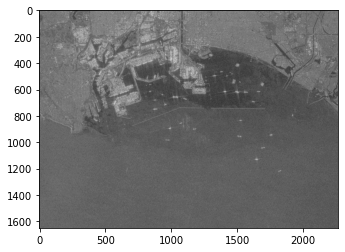

In [14]:
f = plt.figure()
plt.imshow(la_jan_5, cmap='gray')